<a href="https://colab.research.google.com/github/tina2123/Adverserial-Images/blob/main/CIFARAdvers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
drive.mount('/content/gdrive')
mpl.rcParams['figure.figsize'] = (1, 1)
mpl.rcParams['axes.grid'] = False


Mounted at /content/gdrive


In [ ]:
# from tensorflow.keras.models import load_model
# pretrained_model = load_model('/CIFAR10Model.h5')
# # pretrained_model.summary()
# pretrained_model.trainable = False

In [ ]:
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  image = image[None, ...]
  return image
 
# Helper function to extract labels from probability vector

170500096/170498071 [==============================] - 2s 0us/step


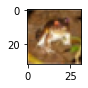

(32, 32, 3)
<class 'numpy.ndarray'>


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(x_train[0].shape)
print(type(x_train[0]))

8192/891 [===================================================================================================================================================================================================================================================================================] - 0s 0us/step
<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'uint8'>
(1, 32, 32, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


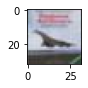

In [ ]:
image_path = tf.keras.utils.get_file('airpln.jpg', 'https://drive.google.com/uc?export=download&id=1hs1fST0y1lEk6Dek5qTFCbk-89laxEZa')


# image_path = tf.keras.utils.get_file('car.jpg', 'https://drive.google.com/uc?export=download&id=1_IGZ1sjB1YSnpBWfbgu7o1VtDsUfn6af')
# image_path = tf.keras.utils.get_file('horse.jpg', 'https://drive.google.com/uc?export=download&id=1ulh7iC9PjvujwRHdxQ1lkpUX4TsIH8iR')
# image_path = tf.keras.utils.get_file('ship.jpg', 'https://drive.google.com/uc?export=download&id=1bGVhF_ys5REeLQmsnmivP4OkIG7va4J6')
# image_path = tf.keras.utils.get_file('cats.jpg', 'https://drive.google.com/uc?export=download&id=127OV8tXXRsa07V5iZ15K0KhyAy4d2FLw')

# image_path = tf.keras.utils.get_file('frog22.jpg', 'https://drive.google.com/uc?export=download&id=1FVYE9dd9sTgCnuqhmUiEPIJEzq9JuaGM')
# image_path = tf.keras.utils.get_file('carn.jpg', 'https://drive.google.com/uc?export=download&id=1i1Ut_0nKVSEN5KjOdWgcPxp7Z6_2EVbt')

image_raw = tf.io.read_file(image_path)
print(type(image_raw))
image = tf.image.decode_image(image_raw)
print(image.dtype)
image = preprocess(image)
print(image.shape)
print(type(image))
plt.figure()
plt.imshow(image[0]) # To change [-1, 1] to [0,1]
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_save_name = 'CIFAR10Model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
pretrained_model = load_model(path)
pretrained_model.trainable = False


[6.1323285e-01 4.6092179e-04 1.1458178e-01 7.6925397e-02 6.2720284e-02
 9.5750131e-03 6.1106317e-02 9.4071630e-04 5.6437843e-02 4.0189149e-03]  
 tf.Tensor(0, shape=(), dtype=int64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


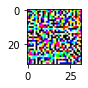

In [ ]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

image_probs = pretrained_model.predict(image)
print(image_probs[0], " \n" , tf.argmax(image_probs[0]),)

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad


labrador_retriever_index = 0
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0]); # To change [-1, 1] to [0,1]

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def display_images(image, description):
  image_probs = pretrained_model.predict(image)
  label = class_names[tf.argmax(image_probs[0])]
  confidence = 100*tf.math.reduce_max(image_probs)
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,label,confidence))
  plt.show()


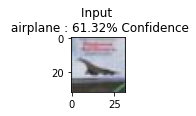

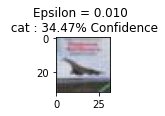

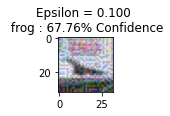

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


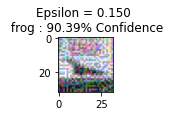

In [ ]:
from PIL import Image
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]
i=0
for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])
  tf.keras.preprocessing.image.save_img('/content/gdrive/My Drive/photoplane%d.jpg'%i,adv_x[0])
  
  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy
import math
phi = []
image_path = tf.keras.utils.get_file('airpln.jpg', 'https://drive.google.com/uc?export=download&id=1hs1fST0y1lEk6Dek5qTFCbk-89laxEZa')

# image_path = tf.keras.utils.get_file('car.jpg', 'https://drive.google.com/uc?export=download&id=1-Oz_UcCkrjEUCiE1KSM7C9yCNeSg_g-Z')
# image_path = tf.keras.utils.get_file('horsel.jpg', 'https://drive.google.com/uc?export=download&id=1ulh7iC9PjvujwRHdxQ1lkpUX4TsIH8iR')
# image_path = tf.keras.utils.get_file('cats.jpg', 'https://drive.google.com/uc?export=download&id=127OV8tXXRsa07V5iZ15K0KhyAy4d2FLw')

# image_path = tf.keras.utils.get_file('frog22.jpg', 'https://drive.google.com/uc?export=download&id=1FVYE9dd9sTgCnuqhmUiEPIJEzq9JuaGM')

# image_path = tf.keras.utils.get_file('horse.jpg', 'https://drive.google.com/uc?export=download&id=1ulh7iC9PjvujwRHdxQ1lkpUX4TsIH8iR')


image_raw = tf.io.read_file(image_path)
image1 = tf.image.decode_image(image_raw)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

# print(image.shape)
image=image.numpy()
print(image.shape)
f_x = pretrained_model.predict(image)[0,0]

# print(f_x)
for i in range (32):
   for j in range (32):
     img_copy =image
     img_copy[0,i,j,0] = 0
     img_copy[0,i,j,1] = 0
     img_copy[0,i,j,2] = 0
     image_probs = pretrained_model.predict(img_copy)
     f_x_i_j=image_probs[0,0]
     phi.append(f_x - f_x_i_j)
print(len(phi))
 

(1, 32, 32, 3)
1024


hi
0.39220938086509705
0.0025867394579108804


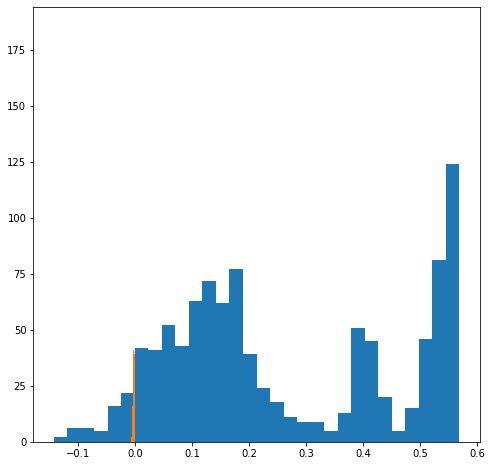

In [ ]:
mpl.rcParams['figure.figsize'] = (8, 8)

# #n=math.ceil((max(phi)-min(phi))/3)
# plt.hist(phi,bins=30)
a = numpy.array(phi)
a1 = numpy.array(phi1)
Q = numpy.percentile(a, [25,75]) 
Q1 = numpy.percentile(a1, [25,75]) 
IQR = Q[1] - Q[0]
IQR1 = Q1[1] - Q1[0]
print(IQR)
print(IQR1)  

8192/1107 [==============================================================================================================================================================================================================================] - 0s 0us/step
0.13074676226824522


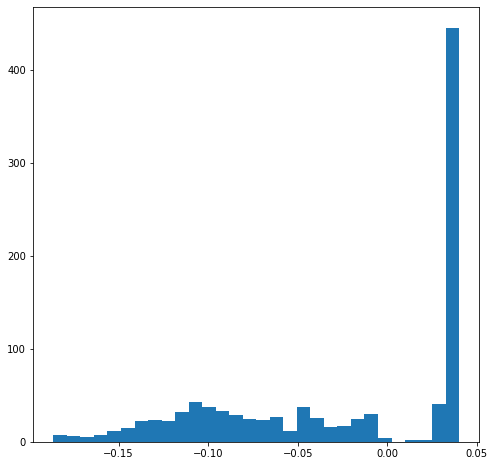

In [ ]:
import numpy
import math
phi = []
# image_path = tf.keras.utils.get_file('airpln3.jpg', 'https://drive.google.com/uc?export=download&id=1-6XkVipuHYvr95YRugdnXmkjfL-NvTvG')
# image_path = tf.keras.utils.get_file('horselAdv1.jpg', 'https://drive.google.com/uc?export=download&id=1-VYfxp5gk2raBvvG6UMTyzY6xp95lrsl')

# image_path = tf.keras.utils.get_file('catAdv.jpg', 'https://drive.google.com/uc?export=download&id=1-4oMc3BEsq4PwVDEl9YaHLWiiOymuiLq')

# image_path = tf.keras.utils.get_file('frogAdv.jpg', 'https://drive.google.com/uc?export=download&id=1--0ZtBFG46mAWgvM0X6TgkmGXvU58BCF')
image_path = tf.keras.utils.get_file('frogAdv.jpg', 'https://drive.google.com/uc?export=download&id=1--0ZtBFG46mAWgvM0X6TgkmGXvU58BCF')


image_raw = tf.io.read_file(image_path)
image1 = tf.image.decode_image(image_raw)
image = tf.image.decode_image(image_raw)
image = preprocess(image)

image=image.numpy()
for i in range (32):
   for j in range (32):
     img_copy =image
     img_copy[0,i,j,0] = 0
     img_copy[0,i,j,1] = 0
     img_copy[0,i,j,2] = 0
     image_probs = pretrained_model.predict(img_copy)
     f_x_i_j=image_probs[0,0]
     phi.append(f_x - f_x_i_j)

mpl.rcParams['figure.figsize'] = (8, 8)

#n=math.ceil((max(phi)-min(phi))/3)
plt.hist(phi,bins=30)
a2 = numpy.array(phi)
Q2 = numpy.percentile(a2, [25,75]) 
IQR2 = Q2[1] - Q2[0]
print(IQR2) 

